In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
uber_data = pd.read_csv('UberDataset.csv')
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
uber_data.shape # check the shape of the dataset

(1156, 7)

In [4]:
uber_data.info() # see null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Data preprocessing

In [5]:
# As we understood that there are a lot of null values in PURPOSE column, 
# so for that we will me filling the null values with a NOT keyword.
uber_data['PURPOSE'].fillna('NOT', inplace=True)

# Now we will check the null values again
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


C:\Users\pc\AppData\Local\Temp\ipykernel_30600\3229557243.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['PURPOSE'].fillna('NOT', inplace=True)


In [6]:
# changing the data type of START_DATE and END_DATE to datetime
uber_data['START_DATE']=pd.to_datetime(uber_data['START_DATE'], errors='coerce') # errors='coerce' will convert invalid parsing to NaT
uber_data['END_DATE']=pd.to_datetime(uber_data['END_DATE'], errors='coerce')

# Getting the duration of the trip in minutes
uber_data['DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60

uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


In [7]:
# Splitting the START_DATE to date and time column 
# and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night
from datetime import datetime

uber_data['start_date'] = pd.DatetimeIndex(uber_data['START_DATE']).date
uber_data['start_time'] = pd.DatetimeIndex(uber_data['START_DATE']).hour

#changing into categories of day and night
uber_data['day-night'] = pd.cut(x=uber_data['start_time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

# Once we have worked with the START_DATE & END_DATE, we can drop them
uber_data.drop(columns=['START_DATE','END_DATE'], inplace=True)

In [8]:
# Once we are done with creating new columns, we can now drop rows with null values.
uber_data.dropna(inplace=True)

# It is also important to drop the duplicates rows from the dataset.
uber_data.drop_duplicates(inplace=True)

# Now we can check the shape of the dataset again
uber_data.shape

(413, 9)

In [9]:
uber_data.head()

,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,start_date,start_time,day-night
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,2016-01-01,21.0,Night
1,Business,Fort Pierce,Fort Pierce,5.0,NOT,12.0,2016-01-02,1.0,Morning
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,2016-01-02,20.0,Night
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,2016-01-05,17.0,Evening
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,2016-01-06,14.0,Afternoon


Data Visualization

In [10]:
uber_data.select_dtypes('object').nunique() # check the unique values in object type columns

CATEGORY        2
START         108
STOP          112
PURPOSE         7
start_date    113
dtype: int64

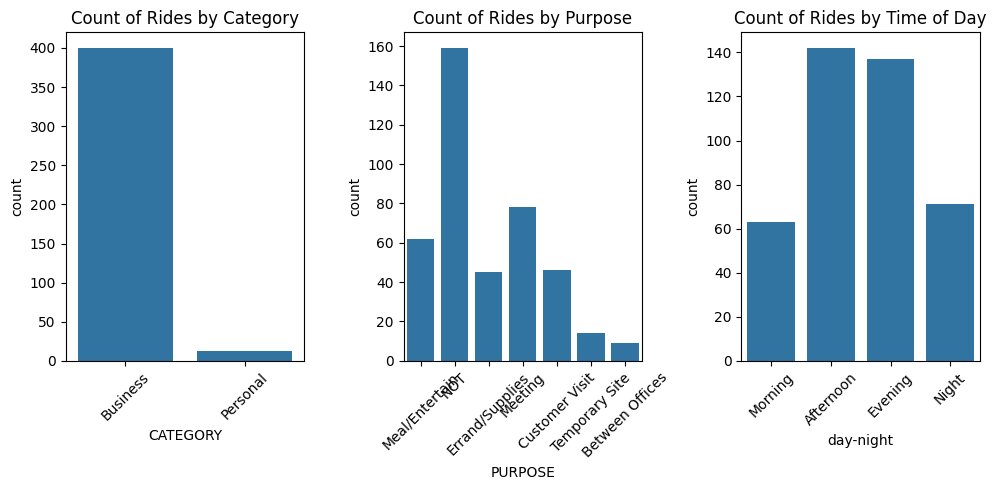

In [11]:
# Now, we will be using matplotlib and seaborn library for countplot the CATEGORY , PURPOSE and day-night columns.
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
sns.countplot(x=uber_data['CATEGORY'])
plt.title('Count of Rides by Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(x=uber_data['PURPOSE'])
plt.title('Count of Rides by Purpose')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.countplot(x=uber_data['day-night'])
plt.title('Count of Rides by Time of Day')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

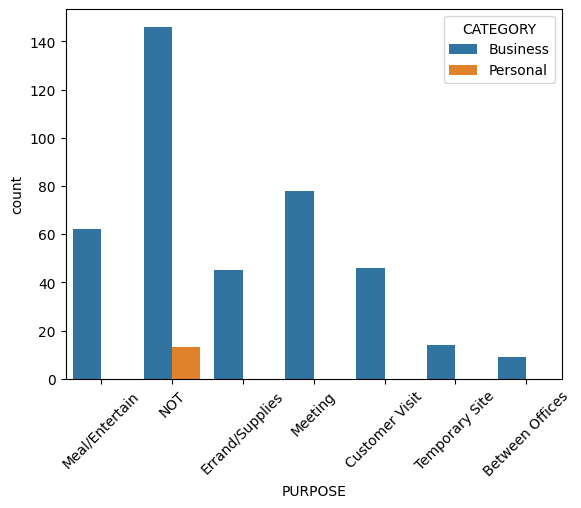

In [12]:
sns.countplot(x='PURPOSE', hue='CATEGORY', data=uber_data)
plt.xticks(rotation=45)
plt.show()

Insights from the above count-plots : 
  - Most of the rides are booked for business purpose.
  - Most of the people book cabs for Meetings and Meal / Entertain purpose.
  - Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

we have seen that CATEGORY , PURPOSE and day-night columns are two very important columns. So now we will be using OneHotEncoder to categories them.

In [13]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding the categorical variables
encoder = OneHotEncoder(sparse_output=False) # initializing the OneHotEncoder with sparse_output=False to get a dense array instead of a sparse matrix

# Fitting the encoder to the categorical columns
encoded_data = encoder.fit_transform(uber_data[['CATEGORY', 'PURPOSE', 'day-night']])

uber_data.drop(columns=['CATEGORY', 'PURPOSE', 'day-night'], inplace=True) # dropping the original categorical columns

# The encoded_data is a numpy array, so we need to convert it to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['CATEGORY', 'PURPOSE', 'day-night']))

# Concatenating the encoded DataFrame with the original DataFrame
uber_data = pd.concat([uber_data, encoded_df], axis=1)

# Displaying the first few rows of the updated DataFrame
uber_data.head()

,START,STOP,MILES,DURATION,start_date,start_time,CATEGORY_Business,CATEGORY_Personal,PURPOSE_Between Offices,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_NOT,PURPOSE_Temporary Site,day-night_Afternoon,day-night_Evening,day-night_Morning,day-night_Night
0,Fort Pierce,Fort Pierce,5.1,6.0,2016-01-01,21.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fort Pierce,Fort Pierce,5.0,12.0,2016-01-02,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Fort Pierce,Fort Pierce,4.8,13.0,2016-01-02,20.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fort Pierce,Fort Pierce,4.7,14.0,2016-01-05,17.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Fort Pierce,West Palm Beach,63.7,67.0,2016-01-06,14.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


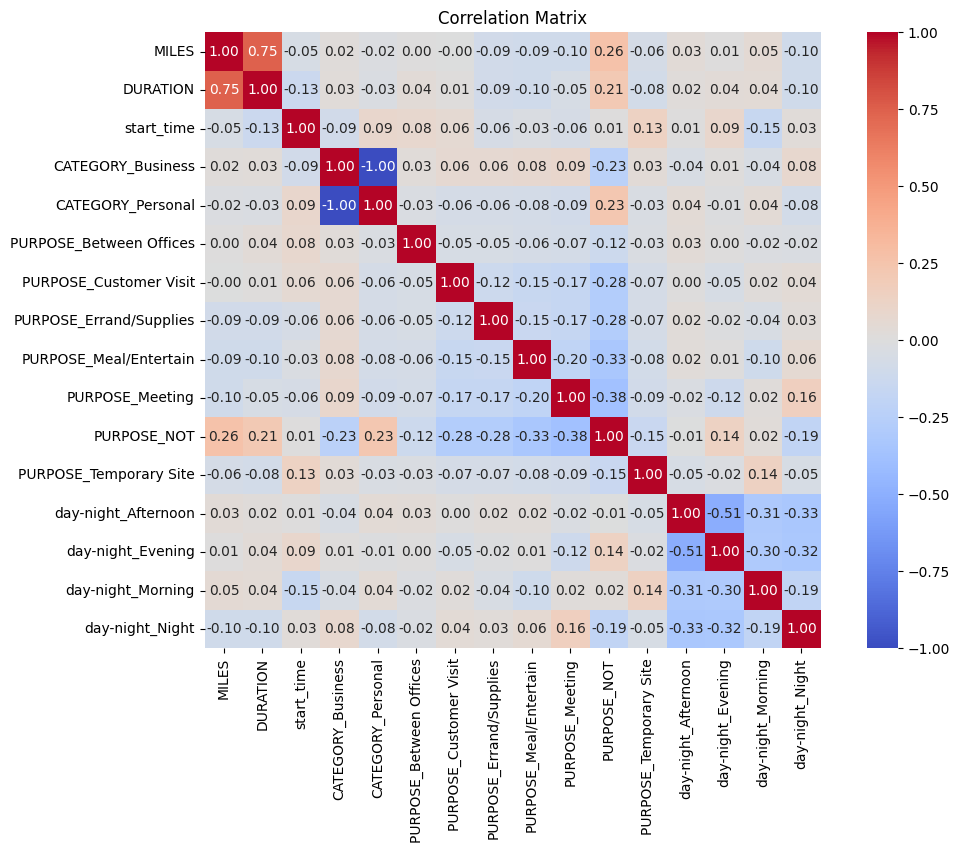

In [14]:
# After encoding the categorical variables, we can find the correlation
#  between the numerical columns and the newly created categorical columns.

numerical_cols = uber_data.select_dtypes('number') # selecting numerical columns
correlation_matrix = numerical_cols.corr() # calculating the correlation matrix between numerical columns

# Plotting the correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Insights: 
   -  The 'DURATION' column has a strong positive correlation with the Miles column, indicating that longer trips tend to cover more distance.
   - Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.

Visualizing For Months data

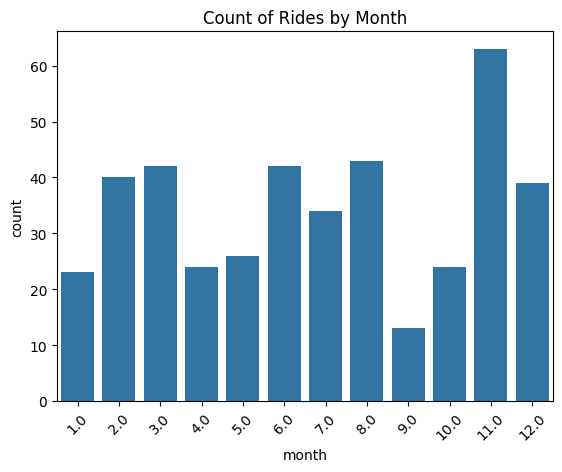

In [15]:
uber_data['start_date'] = pd.to_datetime(uber_data['start_date'], errors='coerce') # converting start_date to datetime

# Extracting the month from the start_date
uber_data['month'] = uber_data['start_date'].apply(lambda x: x.month)

sns.countplot(x='month', data=uber_data)
plt.title('Count of Rides by Month')
plt.xticks(rotation=45)
plt.show()

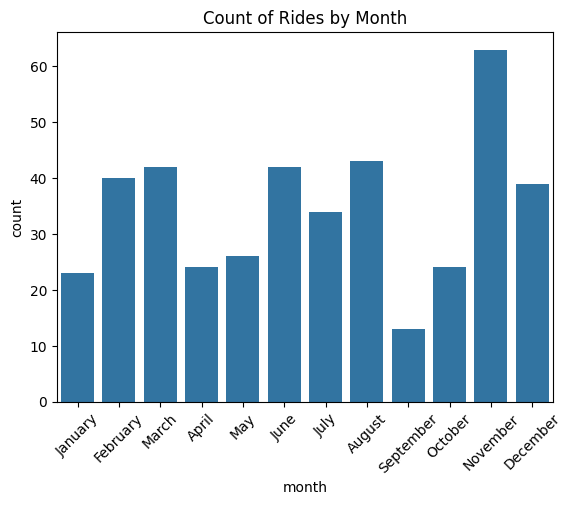

In [16]:
# change the number of months to names
uber_data['month'] = uber_data['month'].replace({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

sns.countplot(x='month', data=uber_data)
plt.title('Count of Rides by Month')
plt.xticks(rotation=45)
plt.show()

Insights:
 - Uber using increase in November and december

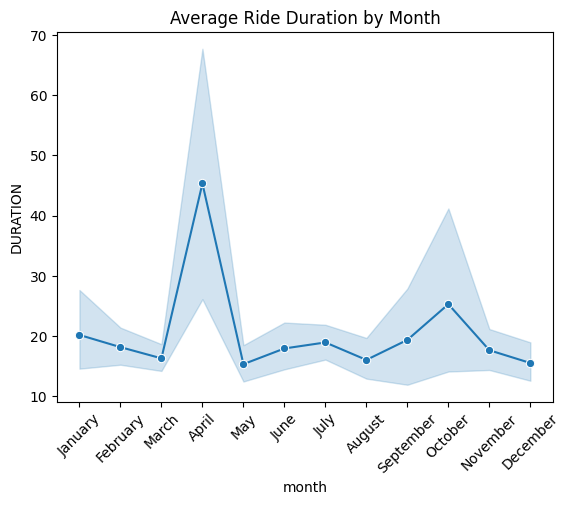

In [17]:
sns.lineplot(x='month', y='DURATION', data=uber_data, marker='o')
plt.title('Average Ride Duration by Month')
plt.xticks(rotation=45)
plt.show()

Insights: 
  - Average duration in April is relatively higher than other months

Visualizing for days data

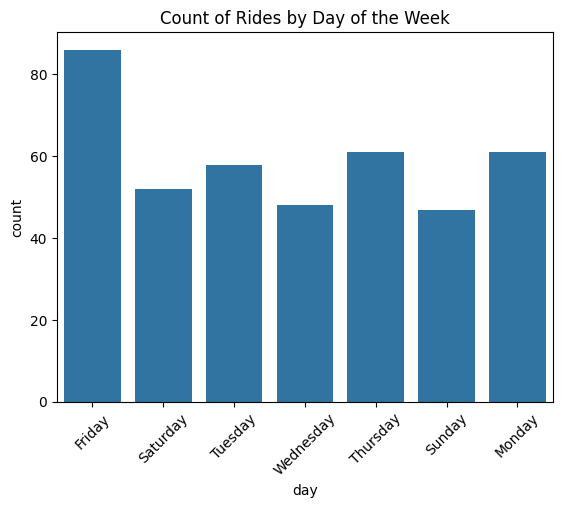

In [18]:
uber_data['day'] = pd.to_datetime(uber_data['start_date']).dt.day_name() # extracting the day name from start_date

sns.countplot(x='day', data=uber_data)
plt.title('Count of Rides by Day of the Week')  
plt.xticks(rotation=45)
plt.show()

Fridays and Mondays are most days that people use uber in

Now, let's explore the MILES Column .

We can use boxplot to check the distribution of the column.

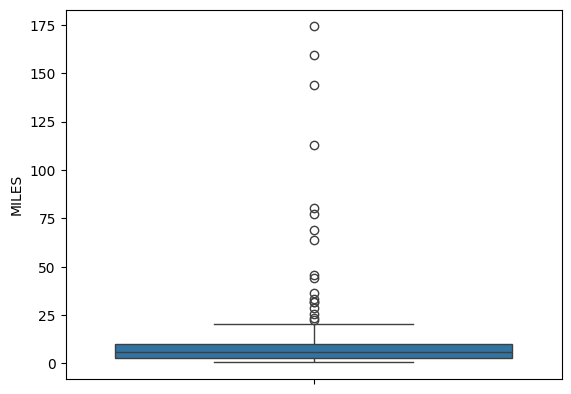

In [19]:
sns.boxplot(uber_data['MILES'])
plt.show()

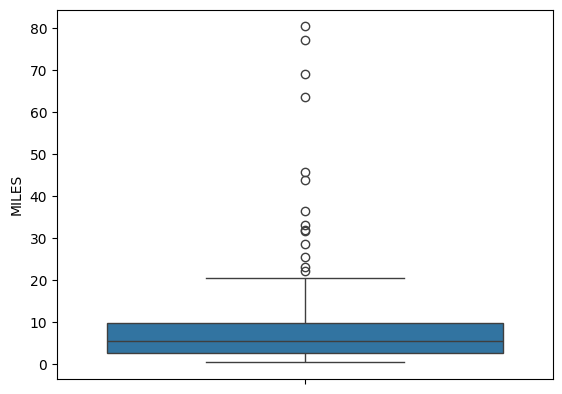

In [20]:
# Now lets zoom in for values in MILES less than 100
sns.boxplot(uber_data[uber_data['MILES']<100]['MILES'])
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_30600\1528517858.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(uber_data[uber_data['MILES']<40]['MILES'], kde=True, bins=30)


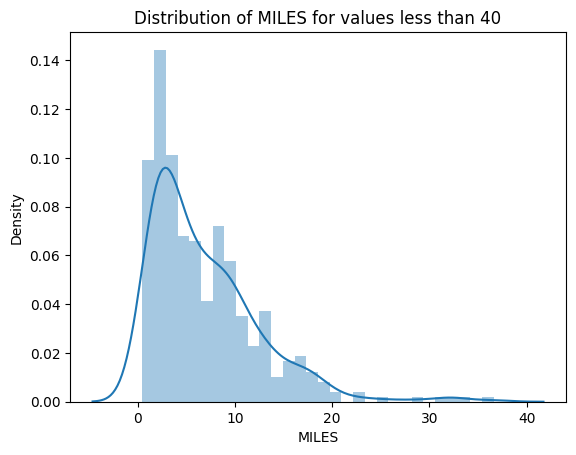

In [21]:
# It's bit visible. But to get more clarity we can use distplot for values less than 40.
sns.distplot(uber_data[uber_data['MILES']<40]['MILES'], kde=True, bins=30)
plt.title('Distribution of MILES for values less than 40')
plt.show()

Insights from the above plots :
 - Most of the cabs booked for the distance of 4-5 miles.
 - Majorly people chooses cabs for the distance of 0-20 miles.
 - For distance more than 20 miles cab counts is nearly negligible.